<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module E** 
**3.2** Continuity and Differentiation

**3.3** Unconstrained Optimization

---


**Section 3.2: Continuity and Differentiation**

*Summary:*

Optimization is a critical compontent to data science and artificial intelligence. With a deep understanding of concepts like limits, extrema, and derivatives, we can approach optimization from a computational point of view. Using the `sympy` library we can find the numerical solutions for these, and then use them toward an optimization problem. 



---


*Implementation:*

Finding the limit for the function $\lim_{x\to 2}\frac{x^2 - 4}{x-2}$



In [4]:
from sympy import Symbol, Limit

# Define the symbol and function
x = Symbol('x')
f = (x**2 - 4) / (x - 2)

# What x approaches
a = 2

# Calculate the limit
limit = Limit(f, x, a).doit()

print(f'For the function {f}:')
print(f'The limit of the function as x approaches {a} is {limit}.')


For the function (x**2 - 4)/(x - 2):
The limit of the function as x approaches 2 is 4.


Find the limit of a function $\lim_{x\to \infty}\frac{1}{x}$

In [7]:
from sympy import oo
f2 = 1/x
limit2 = Limit(f2, x, oo).doit()

print(f'For the function {f2}:')
print(f'The limit of the function as x approaches {oo} is {limit2}.')

For the function 1/x:
The limit of the function as x approaches oo is 0.


In [62]:
from scipy.optimize import minimize_scalar

# Define the function to be minimized
def f(x):
    return x**2 - 6*x + 5

# Use the minimize_scalar function to find the minimum
result = minimize_scalar(f)

print(f"The minimum value is {result.fun} at x = {result.x}")

The minimum value is -4.0 at x = 2.99999995559


We can verify this minimum graphically using `matplotlib`:

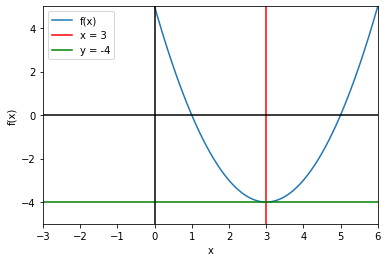

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values to plot
x_values = np.linspace(-5, 10, 1000)

# Evaluate the function at each x value
y_values = f(x_values)

result.x = round(result.x)
# Plot the function and minimum value
plt.plot(x_values, y_values, label='f(x)')
plt.axvline(result.x, color='r', label=f'x = {result.x}')
plt.axhline(-4, color='g', label=f'y = -4')

# Plot axes
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.ylim(-5,5)
plt.xlim(-3,6)
plt.legend()
plt.axis()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

We can use the same library to find derivatives as well:

In [64]:
import sympy

# Define the variable and the function
x = sympy.symbols('x')
f = x**2 - 4*x + 1

# Calculate the derivative of the function
df = sympy.diff(f, x)

print(f'The derivative of \n{f} is \n{df}')

The derivative of 
x**2 - 4*x + 1 is 
2*x - 4


The library `sympy` also has built-in taylor series functions, let's consider the function $f(x) = e^{x}$

5th order approximation: x**4/24 + x**3/6 + x**2/2 + x + 1


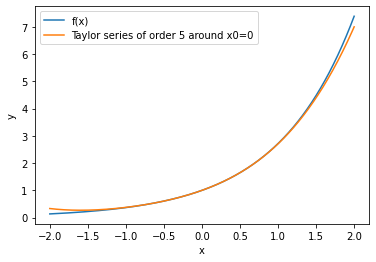

In [84]:
# Define the variable and the function
x = sympy.symbols('x')
f = sympy.exp(x)

# Choose a point at which to approximate the function
x0 = 0

# Define the order of the Taylor series
n = 5

# Calculate the Taylor series using sympy
taylor = sympy.series(f, x, x0, n).removeO()

# Define the range of x values to plot
x_min, x_max = -2, 2
x_values = np.linspace(x_min, x_max, 1000)

# convert sympy expressions into workable numpy functions
y_values = sympy.lambdify(x, f)(x_values)
t_values = sympy.lambdify(x, taylor)(x_values)

print(f'5th order approximation: {taylor}')
# Plot the function against the Taylor series approximation
plt.plot(x_values, y_values, label='f(x)')
plt.plot(x_values, t_values, label=f'Taylor series of order {n} around x0={x0}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Section 3.2: Unconstrained Optimization**

*Summary:*

Unconstrained optimization is another key component for data science and artificial intelligence. It is important to find optimal values of a function, such as local extrema, without constraining our input variables. This often requires the use of algorithms involving gradient descent. 

With gradient descent, we can find minimum of a function, for example, by iteratively adjusting the value of the input variable toward the direction of a negative gradient. Moving along the descent leads us to the minimum, similar to a ball rolling down a hill which will rest at a lower point.


---


*Implementation:*

We can illustrate gradient descent as a method of finding minima. First we define a function $f(x) = x^2 - 6x + 5$. Its gradient would then be $2*x - 6$.

In [ ]:
# Define the function to be minimized
def f(x):
    return x**2 - 6*x + 5

# Define the gradient of the function
def grad_f(x):
    return 2*x - 6

In order to use gradient descent we would need an initial guess. We can try an initial guess based on how the function looks graphically.

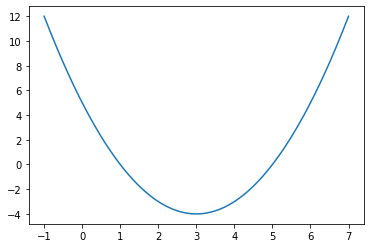

In [87]:
x_min, x_max = -1, 7
x_plot = np.linspace(x_min, x_max, 1000)
f_plot = f(x_plot)
plt.plot(x_plot, f_plot, label='f(x)')
plt.show()

At $x = 5$, we should be sufficiently close to the local minimum. Now we can construct a loop using a step size while we iterate. The loop will run until we are within our tolerance or we have reached a maximum number of iterations.

In [89]:
# Define the step size and the initial guess for x
step = 0.1
x_init = 5

# Define the maximum number of iterations and the tolerance for convergence
max_iter = 100
tolerance = 1e-6

# Initialize the iteration counter, the value of x
iter = 0
x = x_init

# Initialize lists to store the values of x and f(x) at each iteration
x_values = [x]
f_values = [f(x)]

# Gradient descent
while iter < max_iter:
    # Calculate the gradient of the function at the current value of x
    grad = grad_f(x)
    
    # Update the value of x using the gradient and step size
    x_new = x - step * grad
    
    # Calculate the change in x and f(x) from the previous iteration
    dx = abs(x_new - x)
    df = abs(f(x_new) - f(x))
    
    # Append the new values of x and f(x) to the lists
    x_values.append(x_new)
    f_values.append(f(x_new))
    
    # Check if the change in x and f(x) is below the tolerance level
    if dx < tolerance and df < tolerance:
        print(f"Converged after {iter+1} iterations")
        break
    
    # Update the iteration counter and the value of x
    iter += 1
    x = x_new

# Print the result
print(f"The minimum value is {f(x)} at x = {x}")

Converged after 59 iterations
The minimum value is -3.9999999999770637 at x = 3.0000047890485653


Since we stored each updated point after applying the gradient descent, we can plot the progress of our approximate minimum against the function.

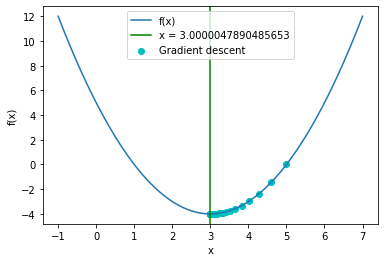

In [94]:
# Plot the function and the values of x at each iteration
plt.plot(x_plot, f_plot, label='f(x)')
plt.axvline(x, color='g', label=f'x = {x}')
plt.scatter(x_values, f_values, c='c', label='Gradient descent')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

As the gradient descent algorithm iterated, the points went from our initial guess at $x = 5$ and continued closer and closer to $x=3$